<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week1_RVVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222

# Random Variables Video Lecture


## Random Variables and Distributions


We say that $X$ is a random variable if it takes on a value depending on random event.  When $X$ is real valued, we can define the Cumulative Distribution Function (CDF) as follows:

$$F_X(x) = \mathrm{Pr}(X\leq x)$$


When $F_X(x)$ is differentiable, we can define the Probability Denisty Function (PDF) via

$$f_X(x) = \frac{dF_X(x)}{dx}$$


Note that sometimes people refer to PDF as meaning "Probability Distribution Function". 



These kinds of distributions are called continuous distributions.




Some things that are true:


$F_X(x)$ is monotonically non-decreasing.

If the range of values that $X$ is $[a,b]$ where possibly $b = \infty$, then

$F(b) = 1$   ( in the case that $b = \infty$, we mean that $\lim_{x \to \infty} F(x) = 1$)


$f_X(x) \geq 0, \forall x$  Densities are always non-negative.


By FTC, 

$F_X(x) = \int_a^x f_X(s) ds$ 

And therefore 


$\int_a^b f(x) dx  = 1$



## Some Common Metrics

Given a continuous distribution, there are some important metrics we can (usually) calculate.

### Measures of Centrality


**The mean**

$\mu_X = \mathrm{E}[X] = \int_a^b xf(x) dx$



**The median**


$median_X = X_{0.5} = F^{-1}_X(0.5)$


**The mode**

$mode_X = \mathrm{argmax}(f(x))$


### Measures of Dispersion

**Variance**

$\mathrm{Var}(X) = \sigma^2_X = \mathrm{E}[(X-\mu_X)^2] = \mathrm{E}[X^2] - \mu_X^2 = M_2(X) - M_1(X)^2$


Here we use the notation $M_n(X) = \mathrm{E}[X^n]$ which is called the *nth moment*.


**Standard Deviation**

$sd_X = \sqrt{\mathrm{Var}(X)} = \sigma_X$




**Inter Quartile Range (IQR)**

If we define $X_q = F_X^{-1}(q)$ then 

$IQR = X_{.75} - X_{.25}$



**Median Absolute Deviation**

$MAD = median_{|X - X_{0.5}|}$







### Meaures of shape

**Skew**


$$\mathrm{Skew}(X) = \mathrm{E}\left[\left(\frac{X-\mu_X}{\sigma_X}\right)^3   \right]$$


This can be shown to be

$$\mathrm{Skew}(X) = \frac{1}{\sigma_X^3}\left(M_3(X) - 3\sigma_X^2\mu_X - \mu_X^3\right)\\
  $$


Loosely speaking, positive skew means there are more values "far" to the right of the mean than the left.

Negative skew means the opposite.


**Kurtosis**



$$\mathrm{Kurt}(X) = \mathrm{E}\left[\left(\frac{X-\mu_X}{\sigma_X}\right)^4   \right]$$

And this can be shown to be


$$\mathrm{Kurt}(X)= \frac{1}{\sigma_X^4}\left( M_4(X) - 4M_3(X)\mu + 6\sigma_X^2\mu_X^2 + 3\mu_X^4\right)$$



The Normal Distribution has a Kurtosis of $3$.  This motivates the definition of Excess Kurtosis:



$$\mathrm{EKurt}(X) = \mathrm{Kurt}(X)  -3$$


If $\mathrm{EKurt}(X) >0$ we say that the disribution is *leptokurtic*.

If $\mathrm{EKurt}(X) < 0$ we say that the disribution is *platykurtic*.


Leptokurtic distributions are said to have fatter tails.




##  Functions of Random Variables


If $X$ is a random variable, and $g(x)$ is some function, then $Y = g(X)$ is also a random variable.

Furthermore, 

$\mathrm{E}[Y] = \int_a^b g(x) f_X(x) dx$

and we can calculate all the above measures for $Y$.





#### Example

Let $F_X(x) = \sqrt{x}$ for $x \in [0,1]$

Find $f_X(x)$.  Plot both $f_X(x)$ and $F_X(x)$ then 

calculate the above measures of centrality and dispersion. 

**Solution**


$f_X(x) = \frac{d}{dx}  \sqrt{x} = \frac{1}{2}x^{-\frac{1}{2}}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt



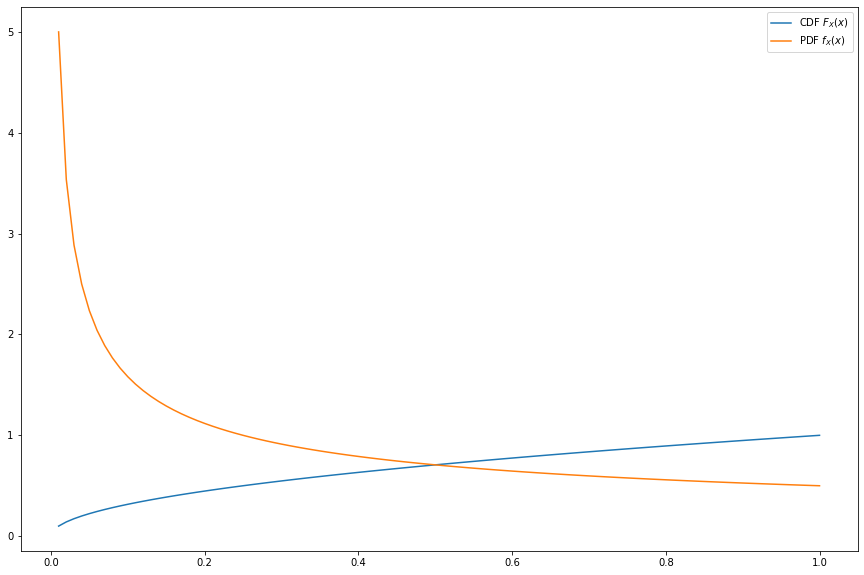

In [ ]:
x = np.linspace(0.01,1,100)

F = lambda x: np.sqrt(x)

f = lambda x: 0.5* x**(-.5)


plt.figure(figsize = (15,10))

plt.plot(x,F(x), label = "CDF $F_X(x)$")
plt.plot(x,f(x), label = "PDF $f_X(x)$")


plt.legend()

plt.show()

For the expected value, we first do it "by hand".

$$\mu_X = \int_0^1 x f_X(x) dx = \int_0^1 \frac{1}{2} x^{\frac{1}{2}} dx\\
= \frac{1}{3} x^{\frac{3}{2}}\Big{|}_0^1 = \frac{1}{3}$$


But we can also do this numerically:



In [ ]:
from scipy.integrate import quad

mu = quad(lambda x: x*f(x), 0,1)[0]

print(mu)

0.3333333333333334


For the median, we solve

$\frac{1}{2} = F_X(X_{0.5}) = \sqrt{X_{0.5}}$

$\Rightarrow X_{0.5} = \frac{1}{4}$


For the mode, we observe that $f_X(x) \to +\infty$ as $x \to 0^+$.  So the mode is $0$.

To compute variance, we first compute $M_2(X)$

$$M_2(X) = \int_0^1 x^2 \frac{1}{2}x^{-\frac{1}{2}}dx\\
= \frac{1}{5} x^{\frac{5}{2}}\Big{|}_0^1  = \frac{1}{5}$$

So we conclude that

$$\mathrm{Var}(X) = M_2(X) - \mu_X^2 = \frac{1}{5} - \left(\frac{1}{3}\right)^2 = \frac{4}{45}$$

Again, we can do this numerically.


In [ ]:
M2 = quad(lambda x: x**2*f(x), 0,1)[0]

v = M2 - mu**2

print(v)

0.08888888888105272


In [ ]:
v*45

3.9999999996473723

And of course, $\sigma = \sqrt{\frac{4}{45}} = \frac{2}{3\sqrt{5}} = \frac{2\sqrt{5}}{15}$

In [ ]:
print("The Standard Deviation is ", (2*np.sqrt(5)/15))

The Standard Deviation is  0.29814239699997197


For IQR,

$IQR = F^{-1}_X(.75) -  F^{-1}_X(.25) = (\frac{3}{4})^2 - (\frac{1}{4})^2 = \frac{1}{2}$

For MAD, want the median value of $|X - \frac{1}{4}|$.  We solve,

$\mathrm{Pr}\left(|X - \frac{1}{4}| \leq MAD\right) = \frac{1}{2}$

for MAD.

$$\frac{1}{2} = \mathrm{Pr}\left(|X - \frac{1}{4}| \leq MAD\right)\\
=\mathrm{Pr}\left(X - \frac{1}{4} \leq MAD \land X - \frac{1}{4} \geq -MAD \right)\\
= F_X\left(MAD + \frac{1}{4}\right)  - F_X\left(-MAD + \frac{1}{4}\right)\\
\sqrt{\frac{1}{4}+MAD} - \sqrt{\frac{1}{4}-MAD } $$


We multiply both sides by 2 and square it.






$$1  = 1 + 4 MAD  - 2\sqrt{1-16 MAD^2 }   +1 - 4 MAD  $$

OR

$$2\sqrt{1- 16 MAD^2  } = 1$$

$\Rightarrow$

$$1- 16 MAD^2  = \frac{1}{4}$$

$$\Rightarrow MAD^2 = \frac{3}{64}$$

$$\Rightarrow MAD = \frac{\sqrt{3}}{8}\\
\approx 0.2165$$


Of course, this was kind of tedious, and we can't always do things by paper and pencil (or correctly).  Good thing we have computers!

Define $Y = |X - 0.25|$  ,

Then $F_Y(y) = F_X(\frac{1}{4}+y) - F_X(\frac{1}{4} -y)$.

We use fsolve to find out where this will have a value of 0.5.



In [ ]:
FY = lambda y: F(.25+ y) - F(.25 - y)

from scipy.optimize import fsolve

fsolve(lambda y: FY(y) - .5, .1)

array([0.21650635])

### Key Point

1. We can descrive Continous Random Variabless via their PDF or CDF
2. Certain common metrics that tell things about the distributions
3. We should get comfortable numerical methods


